In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [130]:
X,y = make_blobs(n_samples=1000,centers = 2)

In [131]:
X.shape

(1000, 2)

In [132]:
# y

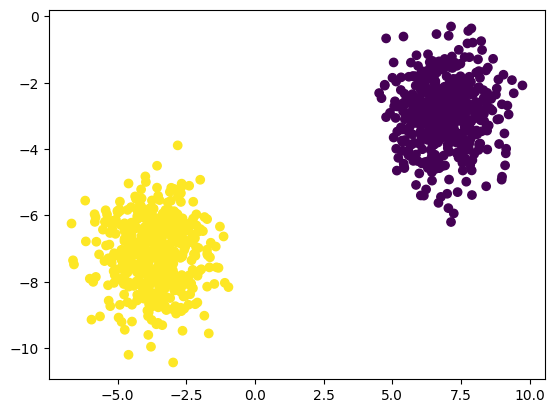

In [133]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [134]:
y[y == 0] = -1

In [135]:
class SVM:
    def __init__(self,lr = 0.01,C = 1):
        self.lr = lr
        self.C = C
        
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)
        
    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def functional_margin(self,x,w,w0,y):
        return y*self.hypothesis(x,w,w0)

    def loss(self,x,w,w0,y):
        ti = self.functional_margin(x,w,w0,y)
        er = 1-ti
        er[er < 0] = 0
        
        return 0.5*(w@w) + self.C*np.sum(er)

    def predict(self,X):
        ypred = self.hypothesis(X,self.w,self.w0)
        ypred[ypred < 0] = -1
        ypred[ypred >= 0] = 1
        return ypred

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.ones(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ti = self.functional_margin(X,w,w0,y)
            ti[ti < 1] = -1
            ti[ti >= 1] = 0
            grads = w + self.C*((ti*y)@X)
            w = w - lr*grads
            w0 = w0 - lr*self.C*np.sum(ti*y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [136]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [162]:
clf = SVM(lr = 0.001,C = 1)
clf.fit(x_train,y_train,100)

In [163]:
ypred = clf.predict(x_train)
print(accuracy_score(y_train,ypred))

1.0


In [164]:
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

1.0


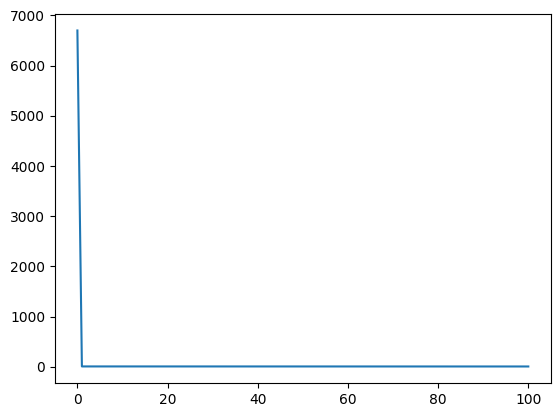

In [165]:
plt.plot(clf.loss_e)
plt.show()

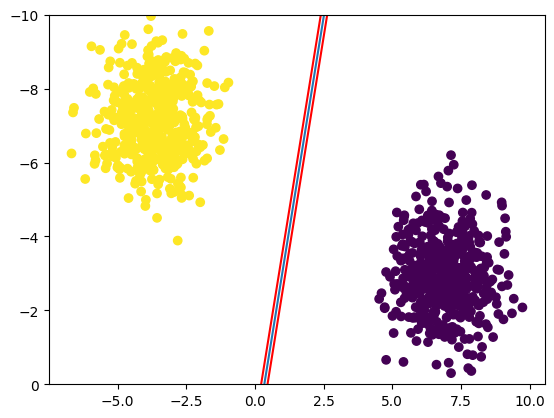

In [167]:
x1 = np.linspace(-6,6,100)
x2 = -(clf.w[0]*x1+clf.w0)/clf.w[1]
plt.plot(x1,x2)

s1x2 = (1/np.linalg.norm(clf.w,ord=2)-(clf.w[0]*x1+clf.w0))/clf.w[1]
plt.plot(x1,s1x2,c='r')

s1x2 = (-1/np.linalg.norm(clf.w,ord=2)-(clf.w[0]*x1+clf.w0))/clf.w[1]
plt.plot(x1,s1x2,c='r')

plt.scatter(X[:,0],X[:,1],c = y)
plt.ylim(0,-10)
plt.show()